# Audio classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path 
from fastai.vision import *
from fastai.metrics import error_rate

In [18]:
bs = 16
np.random.seed(42)

In [19]:
path = %pwd
path = Path(f'{path}/../../data/audio_pil_og_flue/')

In [20]:
doc(ImageDataBunch.from_folder)

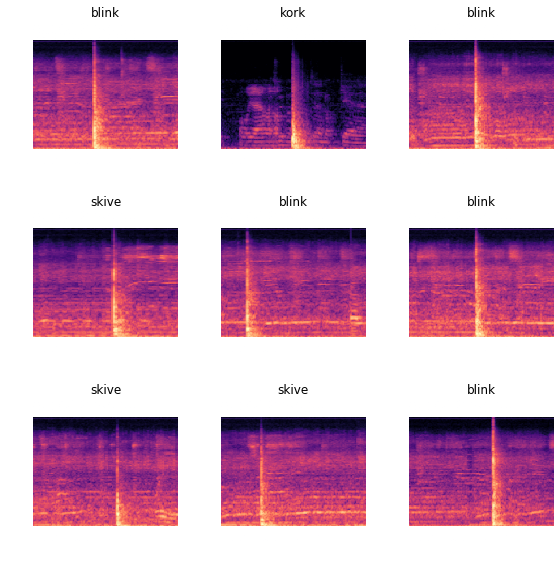

In [21]:
data = ImageDataBunch.from_folder(path, train="train_melspectogram", valid='val_melspectogram', ds_tfms=None, size=256, bs=bs)
data.normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(8,8))

In [22]:
print(data.classes) 

['blink', 'kork', 'skive']


## Training

In [23]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/home/sathiesh/anaconda3/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


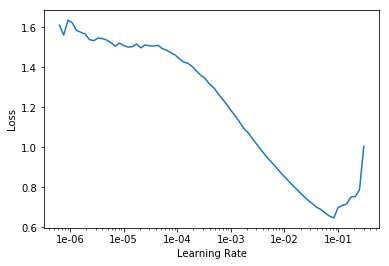

In [24]:
learn.lr_find()
learn.recorder.plot()

In [25]:
lr= 3e-2
learn.fit_one_cycle(6, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,1.107877,1.876374,0.666667,00:06
1,0.645229,0.594252,0.222222,00:06
2,0.470795,1.569304,0.333333,00:06
3,0.352329,1.343249,0.259259,00:06
4,0.289067,0.766035,0.222222,00:06
5,0.262945,0.381066,0.148148,00:06


In [26]:
learn.save('stage-1')

In [31]:
learn.unfreeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,lr/10))

epoch,train_loss,valid_loss,error_rate,time
0,0.017959,0.898353,0.148148,00:07
1,0.184050,1.030879,0.185185,00:07


In [33]:
learn.save('stage-2')

In [ ]:
#TODO increasing the image size
#data = (src.transform(None, size=256).databunch().normalize(imagenet_stats))
#learn.data = data
#data.train_ds[0][0].shape

## Interpretation

In [34]:
learn.load('stage-2');

In [35]:
interp = ClassificationInterpretation.from_learner(learn)

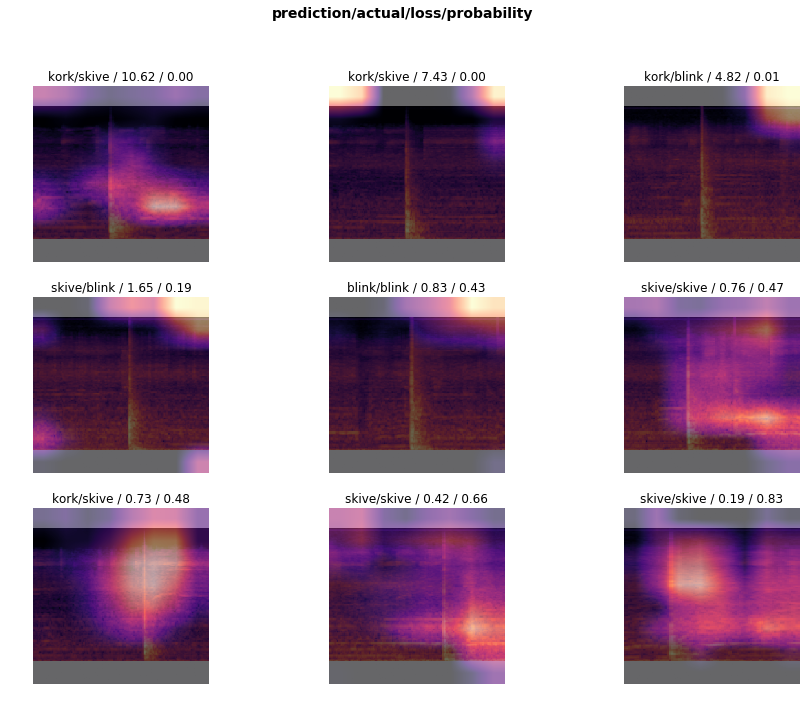

In [36]:
interp.plot_top_losses(9, figsize=(15,11))

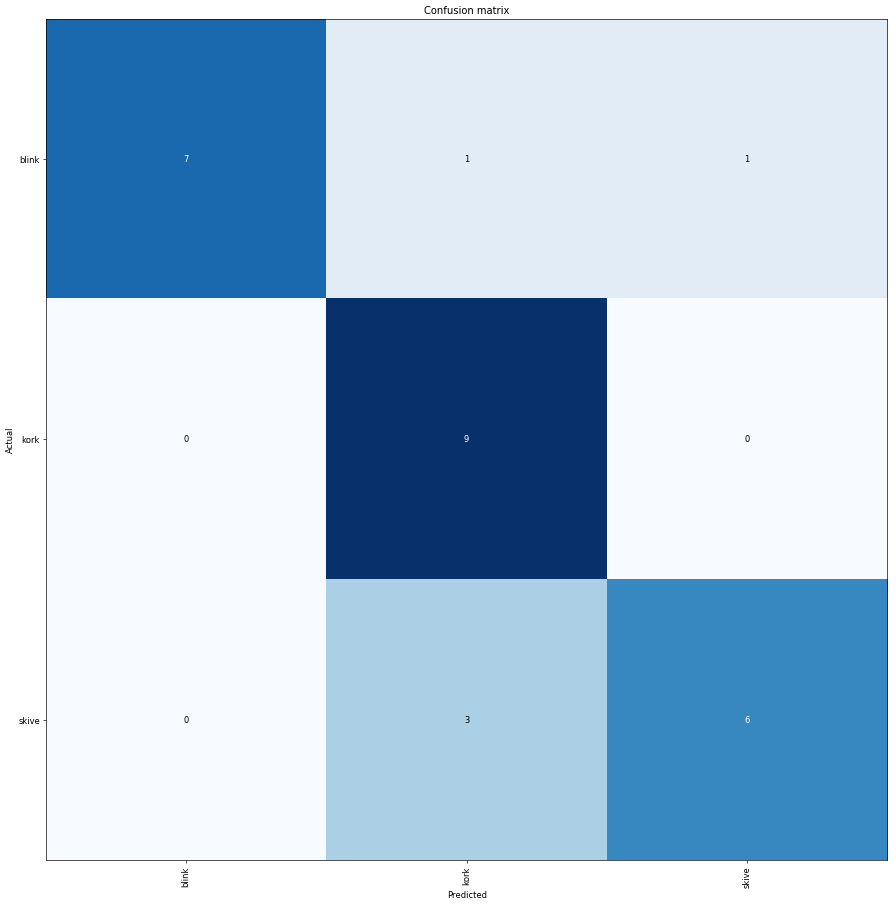

In [37]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)